# Explainable AI tutorial

### Connect to EvaDB

In [1]:
%pip install --quiet "evadb[vision,notebook]"
import evadb
cursor = evadb.connect().cursor()
import warnings
warnings.filterwarnings("ignore")


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


100%|██████████| 49.7M/49.7M [00:00<00:00, 103MB/s] 


In [2]:

cursor.query("DROP  FUNCTION IF EXISTS  explainable_AI;").df()
cursor.query("CREATE FUNCTION explainable_AI IMPL '../evadb/functions/explainable_AI.py';").df()

11-24-2023 19:47:38 WARNING[drop_object_executor:drop_object_executor.py:_handle_drop_function:0086] Function explainable_AI does not exist, therefore cannot be dropped.


,0
0,Function explainable_AI added to the database.


###  download video

In [3]:
# Getting MNIST as a video
!wget -nc "https://www.dropbox.com/s/yxljxz6zxoqu54v/mnist.mp4"

--2023-11-24 19:47:45--  https://www.dropbox.com/s/yxljxz6zxoqu54v/mnist.mp4
Resolving www.dropbox.com (www.dropbox.com)... 162.125.9.18, 2620:100:601f:18::a27d:912
Connecting to www.dropbox.com (www.dropbox.com)|162.125.9.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/yxljxz6zxoqu54v/mnist.mp4 [following]
--2023-11-24 19:47:45--  https://www.dropbox.com/s/raw/yxljxz6zxoqu54v/mnist.mp4
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc8fbc482a79fff9be1d715b14bd.dl.dropboxusercontent.com/cd/0/inline/CIKUxWoX5E65otF0kP04sFm-y0lkRaVimOpP7Om4lAxZczSKSOMJ7S1B-7oeeMnCSjKKRS_dqNhoAN9__1XKIJIkWN_-j3GPOR7Ie_z7x2xDZOnj00tch_ThR8VPuQE4TArmHvF5lz75i6Yom94HHMdo/file# [following]
--2023-11-24 19:47:45--  https://uc8fbc482a79fff9be1d715b14bd.dl.dropboxusercontent.com/cd/0/inline/CIKUxWoX5E65otF0kP04sFm-y0lkRaVimOpP7Om4lAxZczSKSOMJ7S1B-7oeeMnCSjKKRS_dqNhoAN9__1XKIJIkWN_-j3GPOR7Ie_z7x2xDZOn

### create table from video
Note: I guess there is a bug of Evadb here. When I call drop table, it said I can't drop this table  My current solution is to create another table so I can avoid dropping table. 

In [4]:
# Load the video into EvaDB
cursor.query("DROP TABLE if exists MNISTVid6").df()
cursor.query("LOAD VIDEO 'mnist.mp4' INTO MNISTVid6").df()

,0
0,Number of loaded VIDEO: 1


### Extract the representation by sending data into explainable_AI function

[6 6 6 ... 6 6 6]
[False False False ... False False False]
[False False False ... False False False]
[False False False ... False False False]
[False False False ... False False False]
[False False False ... False False False]
[False False False ... False False False]
[ True  True  True ...  True  True  True]
[False False False ... False False False]
[False False False ... False False False]
[False False False ... False False False]


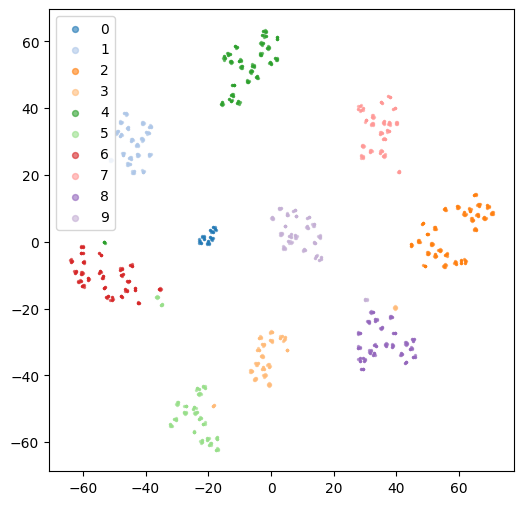

torch.Size([1200])
torch.Size([1200, 28, 28])
    status  aggregate_results
0  success                NaN


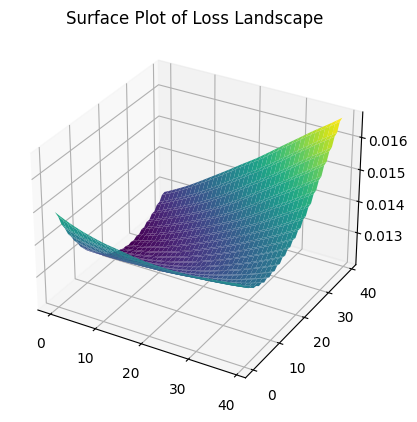

In [5]:
# Run a query on video data
query = cursor.query("""
    SELECT   explainable_AI(data)
    FROM MNISTVid6 ;
""")
response = query.df()
print(response)